## pandas 라이브러리와 탐색적 데이터 분석 과정 익히기

### 1. 탐색적 데이터 분석 과정  
- EDA (Exploratory Data Analysis) 라고 함
- 데이터 분석을 위해 raw data를 다양한 각도에서 관찰하여, 데이터를 이해하는 과정
  - 데이터 분석 주제마다 EDA를 통해 진행하는 과정은 각양각색이므로, 정형화된 패턴은 없지만,
  - 크게 다음과 같은 3가지 과정은 기본이 될 수 있으므로 다음 3가지 과정을 기본으로 이해하기로 함

    1. 데이터의 출처와 주제에 대해 이해
    2. 데이터의 크기 확인
    3. 데이터 구성 요소(feature)의 속성(특징) 확인
       - feature: 데이터 구성 요소를 위미함
       - 예: 어떤 초등학교에 학생 성적을 기록한 데이터가 있다면, 학생 이름, 과목별 성적등을 feature로 볼 수 있음 (가볍게 field/column 이라고 봐도 무방함)
       
       
> 존 튜키라는 미국 통계학자가 제안한 분석 방법론 <br>
> 기존 통계학이 가설을 세우고, 가설을 검정하는 방법론에 치우쳐, 데이터 본래의 정보를 파악하기 어려우므로, 본연의 데이터 탐색에 집중하자는 방법론

### 2. 실제 데이터로 pandas 라이브러리와 탐색적 분석 과정 익히기
#### 코로나 바이러스 데이터와 함께 pandas 라이브러리 익히기
- COVID-19-master 폴더 확인
  - 데이터 다운로드: https://github.com/CSSEGISandData/COVID-19
  - 데이터 압축 풀고 COVID-19-master 폴더를 통째로 pandas_eda 주피터 노트북이 있는 폴더 안에 하위폴더로 이동

#### pandas 라이브러리로 csv 파일 읽기
- csv 파일을 pandas dataframe 으로 읽기 위해 read_csv() 함수를 사용함
- csv 구분자는 quotechar=구분자 옵션을 넣어서 구분자가 다른 경우도 읽기 가능

```
doc = pd.read_csv("파일명", encoding='utf-8-sig', quotechar=',')
```

- 에러 나는 데이터는 항상 있을 수 있음, 해당 데이터는 생략하는 것이 일반적임

```
doc = pd.read_csv("파일명", encoding='utf-8-sig', error_bad_lines=False)
```

In [3]:
import pandas as pd
doc = pd.read_csv("COVID-19-master/csse_covid_19_data/csse_covid_19_daily_reports/06-17-2020.csv", encoding='utf-8-sig', error_bad_lines = False)
doc.head(2)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-06-18 04:33:18,34.223334,-82.461707,73,0,0,73,"Abbeville, South Carolina, US",297.631182,0.00
1,22001.0,Acadia,Louisiana,US,2020-06-18 04:33:18,30.295065,-92.414197,625,32,0,593,"Acadia, Louisiana, US",1007.333387,5.12


#### 참고: pandas 라이브러리로 엑셀 파일 읽기

- 엑셀 데이터 읽기 (맨 앞에 있는 쉬트의 데이터를 읽음)

```
pd.read_excel("파일명")
```

- 특정 쉬트 데이터 읽기: sheet_name 옵션 사용해서, 엑셀 파일의 특정 쉬트를 명시적으로 지정 가능

```
pd.read_excel(파일명, sheet_name=쉬트명)
```

<div class="alert alert-block" style="border: 1px solid #FFB300;background-color:#F9FBE7;">
<font size="3em" style="font-weight:bold;color:#3f8dbf;">탐색적 데이터 분석: 1. 데이터의 출처와 주제에 대해 이해</font><br>

- 국가별 코로나 바이러스 daily 현황 자료
- Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE) 에서 작성
- 데이터 소스는 https://github.com/CSSEGISandData/COVID-19/tree/master/who_covid_19_situation_reports 에 명시
  - 실제 데이터 분석에서는 raw data를 어떻게 가져왔는지에 대해서도 세세히 알필요가 있을 때가 있음
    - PDF로 만들어진 공식 문서에서 추출한 데이터와 공식 웹페이지를 크롤링해서 얻은 자료를 CSV 파일로 생성한 것으로 보임
  - 위 데이터는 테스트용 데이터이므로 출처에 대해서는 이 정도만 파악하기로 함
</div>

<div class="alert alert-block" style="border: 1px solid #FFB300;background-color:#F9FBE7;">
<font size="3em" style="font-weight:bold;color:#3f8dbf;">탐색적 데이터 분석: 2. 데이터의 크기 확인</font><br>
</div>

#### 1. 데이터를 pandas로 읽은 후, 가장 먼저 하는 일

- 데이터 일부 확인하기
  - head(): 처음 5개(디폴트)의 데이터 확인하기
    - head(n=10): 처음 10개(조정 가능)의 데이터 확인하기 
  - tail(): 마지막 5개의 데이터 확인하기
    - tail(n=10): 마지막 10개(조정 가능)의 데이터 확인하기 

In [4]:
doc.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-06-18 04:33:18,34.223334,-82.461707,73,0,0,73,"Abbeville, South Carolina, US",297.631182,0.000000
1,22001.0,Acadia,Louisiana,US,2020-06-18 04:33:18,30.295065,-92.414197,625,32,0,593,"Acadia, Louisiana, US",1007.333387,5.120000
2,51001.0,Accomack,Virginia,US,2020-06-18 04:33:18,37.767072,-75.632346,1018,14,0,1004,"Accomack, Virginia, US",3150.142344,1.375246
3,16001.0,Ada,Idaho,US,2020-06-18 04:33:18,43.452658,-116.241552,986,22,0,964,"Ada, Idaho, US",204.739746,2.231237
4,19001.0,Adair,Iowa,US,2020-06-18 04:33:18,41.330756,-94.471059,12,0,0,12,"Adair, Iowa, US",167.785235,0.000000


In [5]:
doc.tail()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
3742,NaN,NaN,NaN,West Bank and Gaza,2020-06-18 04:33:18,31.952200,35.233200,555,3,415,137,West Bank and Gaza,10.879332,0.540541
3743,NaN,NaN,NaN,Western Sahara,2020-06-18 04:33:18,24.215500,-12.885800,9,1,8,0,Western Sahara,1.506705,11.111111
3744,NaN,NaN,NaN,Yemen,2020-06-18 04:33:18,15.552727,48.516388,902,244,271,387,Yemen,3.024210,27.050998
3745,NaN,NaN,NaN,Zambia,2020-06-18 04:33:18,-13.133897,27.849332,1412,11,1142,259,Zambia,7.680610,0.779037
3746,NaN,NaN,NaN,Zimbabwe,2020-06-18 04:33:18,-19.015438,29.154857,401,4,63,334,Zimbabwe,2.697988,0.997506


#### 2. 보다 다양한 데이터 정보 확인하기
- shape: 데이터의 row, column 사이즈 확인
- info(): column별 데이터 타입과 실제 데이터가 있는 사이즈 확인
  - raw data는 일부 데이터가 없는 경우가 많기 때문에, 실제 데이터의 사이즈 확인이 필요함

In [6]:
doc.shape

(3747, 14)

In [7]:
doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3747 entries, 0 to 3746
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3065 non-null   float64
 1   Admin2               3069 non-null   object 
 2   Province_State       3578 non-null   object 
 3   Country_Region       3747 non-null   object 
 4   Last_Update          3747 non-null   object 
 5   Lat                  3674 non-null   float64
 6   Long_                3674 non-null   float64
 7   Confirmed            3747 non-null   int64  
 8   Deaths               3747 non-null   int64  
 9   Recovered            3747 non-null   int64  
 10  Active               3747 non-null   int64  
 11  Combined_Key         3747 non-null   object 
 12  Incidence_Rate       3674 non-null   float64
 13  Case-Fatality_Ratio  3692 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 410.0+ KB


<div class="alert alert-block" style="border: 1px solid #FFB300;background-color:#F9FBE7;">
<font size="3em" style="font-weight:bold;color:#3f8dbf;">탐색적 데이터 분석: 3. 데이터 구성 요소(feature)의 속성(특징) 확인</font><br>
</div>

#### 1. 각 column 이해하기
- raw data에는 다양한 column 이 있는 경우가 많고, 이 중에서 내가 사용할 column 에 대해서는 확실히 이해하고 있어야 함
- Country_Region: 국가, Lat/Long: 경도, Confirmed: 확진, Deaths: 사망, Recovered: 회복, Active: 확진 중인 사람(사망자/회복자 제외)

In [8]:
doc.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')

#### 2. 속성이 숫자라면, 평균, 표준편차, 4분위 수, 최소/최대갑 확인하기
- describe(): 숫자 데이터의 기본 통계치를 한번에 확인할 수 있음

In [9]:
doc.describe()
# count: 갯수, mean: 평균, std: 표준편차, min: 최소값, max: 최대값
# 25%/50%/75%: 4분위수로 전체 데이터 중, 25%/50%/75% 각각에 해당하는 수치가 몇 인지를 알려줌

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
count,3065.000000,3674.000000,3674.000000,3747.000000,3747.000000,3747.000000,3747.000000,3674.000000,3692.000000
mean,31373.467537,36.117794,-71.789234,2228.436082,119.818255,1087.257806,1002.370697,384.564404,3.405936
std,17034.937197,12.818265,53.710225,11794.317409,1036.924468,12017.744913,13570.601170,661.955483,5.112954
min,66.000000,-52.368000,-164.035380,0.000000,0.000000,0.000000,-663344.000000,0.000000,0.000000
25%,18181.000000,33.588886,-96.138334,20.000000,0.000000,0.000000,15.000000,73.442788,0.000000
50%,29179.000000,37.939950,-86.866900,93.000000,2.000000,0.000000,72.000000,184.987991,1.744139
75%,46057.000000,42.036165,-78.229108,561.000000,17.000000,0.000000,388.000000,437.175347,4.965126
max,99999.000000,71.706900,178.065000,210941.000000,37692.000000,592191.000000,188770.000000,12938.674229,100.000000


#### 3. 속성간 상관관계 이해하기
- corr(method=상관계수): 각 속성간 상관 관계 확인하기 (피어슨 상관계수가 디폴트임)
- 피어슨 상관계수는 선형 상관 관계를 조사하며, 일반적으로
  - +1에 가까우면, 양의 선형 상관 관계 (1에 가까울 수록 선에 가까운 데이터가 많고, 한 변수값이 증가하면, 다른 변수값도 증가)
  - 0에 가까우면 상관관계가 없고
  - -1에 가까우면 음의 선형 상관 관계를 가진다 (-1에 가까울 수록 선에 가까운 데이터가 많고, 한 변수값이 증가하면, 다른 변수값은 감소) 라고
  해석됨
  
  
> 참고: 피어슨 상관계수 관계   <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/Correlation_coefficient.png/600px-Correlation_coefficient.png">
> 출처: [위키피디아]( https://ko.wikipedia.org/wiki/%ED%94%BC%EC%96%B4%EC%8A%A8_%EC%83%81%EA%B4%80_%EA%B3%84%EC%88%98)

In [10]:
doc.corr()

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
FIPS,1.000000,0.106425,0.073331,-0.026945,-0.011028,NaN,-0.028321,-0.095381,-0.011035
Lat,0.106425,1.000000,-0.145108,-0.137496,-0.029729,-0.099878,-0.135595,0.000704,0.014338
Long_,0.073331,-0.145108,1.000000,0.190865,0.100496,0.222922,0.105970,-0.098785,-0.012568
Confirmed,-0.026945,-0.137496,0.190865,1.000000,0.723893,0.396050,0.463329,0.108397,0.073304
Deaths,-0.011028,-0.029729,0.100496,0.723893,1.000000,0.226561,0.352258,0.062429,0.149457
Recovered,NaN,-0.099878,0.222922,0.396050,0.226561,1.000000,-0.627518,0.020436,0.044585
Active,-0.028321,-0.135595,0.105970,0.463329,0.352258,-0.627518,1.000000,0.152067,0.059778
Incidence_Rate,-0.095381,0.000704,-0.098785,0.108397,0.062429,0.020436,0.152067,1.000000,0.045067
Case-Fatality_Ratio,-0.011035,0.014338,-0.012568,0.073304,0.149457,0.044585,0.059778,0.045067,1.000000


#### 참고: 피어슨 상관계수
- 두 변수 X 와 Y 간의 선형 상관 관계를 계량화한 수치로, 수치 자체를 이해하기 위해서는 공분산등 고등수학 범위를 넘어서므로, 다음과 같이 간략한 식을 참고로만 이해하기로 함
- X와 Y가 각각 n 개의 샘플을 가지고 있을 때,

$$
\text{r}_{XY} = \frac{
\sum_{i}^{n} (X_{i} -  \bar{X}) \cdot (Y_{i} -  \bar{Y})}
{\sqrt{\sum_{i}^{n} (X_{i} -  \bar{X})^2} \cdot
\sqrt{\sum_{i}^{n} (Y_{i} -  \bar{Y})^2}
}
$$

$$ \bar{X}: X 샘플의 평균, \bar{Y}: Y 샘플의 평균 $$

#### 참고: 데이터 시각화를 통한 데이터 이해
- 데이터를 보다 깊게 이해하기 위해, 데이터를 시각화할 수 있음
- 방대한 데이터를 숫자로 보는 것보다, 눈으로 보면 보다 명확히 이해할 수 있음
- 다양한 데이터 시각화 라이브러리가 존재하므로, 이 중에서 데이터 탐색의 상관관계 분석을 위해, 바로 사용할 수 있는 라이브러리를 이해하기로 함

#### 이전 데이터 시각화 라이브러리 (참고로만 이해)
- matplotlib: 파이썬에서 가장 기본적으로 사용하는 자료를 그래프로 보여주는 시각화 라이브러리
  - 가장 좋기 때문에, 많이 사용된 것이 아니라, 이전부터 사용해왔기 때문에 사용된다고 하는 편이 맞음
- seaborn: matplotlib을 기반으로 다양한 통계 차트 및 색상 테마를 추가한 라이브러리
  - matplotlib 라이브러리로만은 이쁘지 않았고, 다양한 차트에 대한 요구가 많아서 개발된 라이브러리
  
#### 최신 시각화 라이브러리: plotly
  - pandas 기능과 plotly 를 조합해서 최신/가장 빠르게 시각화 가능
  - pandas 데이터프레임.iplot() 같은 형태로 데이터프레임을 바로 그래프로 그릴 수 있음
  - https://plotly.com/python/
  
  
> 본 전처리에서는 이전 데이터 시각화 라이브러리를 간략히 시각화가 분석에 유용하다는 점만 알려드리고, <br>
> 이전 시각화 라이브러리에 대해 가볍게만 이해할 수 있도록 꾸몄습니다. <br>
> 데이터 분석에서 시각화를 본격적으로 이해할 시에는 최신 시각화 라이브러리를 사용합니다.

#### 보통 다음과 같이 임포트하고 as로 변경된 이름을 사용함

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns

#### 주피터 노트북 상에서 그래프를 표현하기 위해 특별한 명령을 해주어야 함

In [12]:
%matplotlib inline 

#### 화면에 표시될 그래프 사이즈 조정

In [13]:
plt.figure(figsize=(5,5))

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

#### 화면에 표시될 그래프 사이즈 조정

```
sns.heatmap(data = doc.corr(), annot=True, fmt = '.2f', linewidths=0.5, cmap='Blues')
```

- data=테이블형: 데이터셋(데이터프레임)
- annot=True: 박스 안에 값 표시
- fmt='0.2f': 박스 안에 표시될 값의 표시 형식 설정 (0.2f 는 소숫점 두자릿수를 의미함)
- linewidths=0.5: 박스와 박스 사이의 간격 설정
- cmap='Blues': 색상 선택 (https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

<AxesSubplot:>

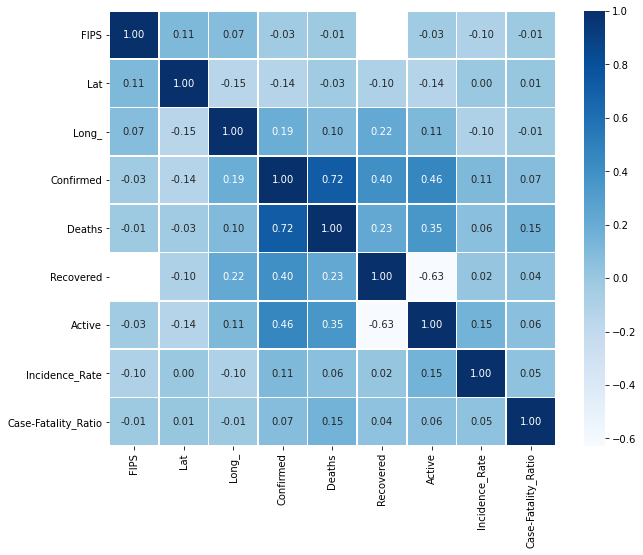

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(data = doc.corr(), annot=True, fmt = '.2f', linewidths=0.5, cmap='Blues')